In [5]:
import random
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Simple random walk implemented with vanilla Python
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

In [3]:
walk[:5]

[0, -1, -2, -3, -2]

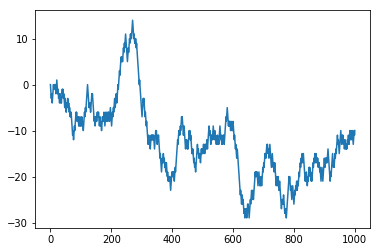

In [4]:
plt.plot(walk)
# Fun!

In [19]:
# A simpler way of doing the same thing with NumPy
nsteps = 1000000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()

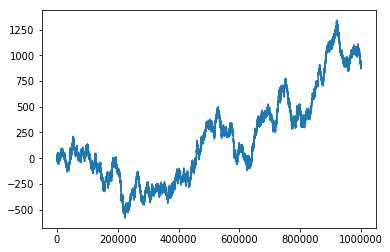

In [20]:
plt.plot(walk)

In [24]:
walk.max()
walk.min()
walk.mean()
walk.std()

440.6141781448989

In [31]:
# Checking to find first instance where walk got 20 steps from start (0)
(np.abs(walk) >= 20).argmax()

825

In [32]:
# Simulating many walks at a single crack
num_steps = 1000
num_walks = 5000
draws = np.random.randint(0, 2, size=(num_walks, num_steps))
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)

In [51]:
walks.shape
walks[:5]

array([[ -1,  -2,  -3, ...,  32,  33,  32],
       [ -1,  -2,  -1, ...,   4,   3,   2],
       [  1,   0,  -1, ..., -14, -15, -14],
       [ -1,   0,  -1, ..., -56, -57, -56],
       [  1,   2,   1, ...,   4,   3,   4]], dtype=int32)

In [57]:
walks.max()
walks.min()
walks.mean()
walks.std()

22.35281063396674

In [61]:
# Same crossing point exercise just across all walks

made_40 = (np.abs(walks)  > 40).any(1)

made_40 # Just a boolean index (aka mask)

made_40.sum() # Number of walks that made 40 (just summing up True from the boolean index)

1997

In [65]:
# Oh cool, and getting the crossing positions across all walks
crossing_times = (np.abs(walks[made_40]) > 40).argmax(1)

crossing_times[:1]

crossing_times.mean()

611.1917876815223

In [68]:
crossing_times.min()
crossing_times.max()
crossing_times.std()

219.18535786935098